### Importing Libs

In [1]:
import collections
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os
import string
import tensorflow as tf
from keras import callbacks, layers
from keras.models import load_model, Model, Sequential
from tensorflow import keras

%matplotlib inline

### Loading pre-trained model

In [2]:
# Loading pre-trained model with synthetic images
pre_trained_model = keras.models.load_model('model/v6.0')

In [3]:
# Altering layers from pre-trained model to not beeing trainable (For fine tuning only correct ones)
for layer in pre_trained_model.layers[:]:
    layer.trainable = False

In [4]:
# Check if every layer is all right
for layer in pre_trained_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7efdd6831f40> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efdd4297850> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efdd4297f70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efdd421f4c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efdd421fd00> False
<tensorflow.python.keras.layers.core.Flatten object at 0x7efdd421ffd0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7efdd423d2e0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7efdd423d7c0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7efdd423ddc0> False
<tensorflow.python.keras.layers.core.Dense object at 0x7efdd4247400> False
<tensorflow.python.keras.layers.core.Dense object at 0x7efdd4247a00> False
<tensorflow.python.keras.layers.core.Dropout object at 0x7efdd424e190> False
<tensorflow.python.keras.layers.core.Dropout

In [5]:
# Resume of pre-trained model
pre_trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40, 110, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 38, 108, 32)  320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 19, 54, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 19, 54, 32)   9248        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [6]:
# Removing final layers from pre-trained model
base = keras.Model(pre_trained_model.inputs, pre_trained_model.layers[-16].input)
base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 110, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 38, 108, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 54, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 27, 32)        0         
Total params: 9,568
Trainable params: 0
Non-trainable params: 9,568
_________________________________________________________________


In [7]:
# Checking if base layers are still not traineble
for layer in base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7efdd6831f40> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efdd4297850> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efdd4297f70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efdd421f4c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efdd421fd00> False


### Creating new model

In [8]:
# Creation of new model with the old one as base
def createmodel():
    
    # Base model (pre-trained)
    prev_model = base.output
    
    # Flattening layer
    flat = layers.Flatten()(prev_model)

    outs = []
    
    for _ in range(5):
    # For 5 characters captchas
    
        # Connection Layer
        dens1 = layers.Dense(128, activation = 'relu')(flat)
        
        # Dropout Layer
        drop = layers.Dropout(0.15)(dens1)
        
        # Exit Layer (for 10 possible characters)
        res = layers.Dense(10, activation = 'softmax')(drop)
        
        # Append final result
        outs.append(res)
    
    # CNN Compile
    model = Model(base.input, outs)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
    
    return model

In [9]:
# Model Resume
model = createmodel();
model.summary();

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40, 110, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 38, 108, 32)  320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 19, 54, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 19, 54, 32)   9248        max_pooling2d[0][0]              
____________________________________________________________________________________________

### New Dataset

In [10]:
# Folder with real captchas to train the new model
os.listdir("real_captcha/train")

['43328.jpeg',
 '00030.jpeg',
 '00066.jpeg',
 '00266.jpeg',
 '00307.jpeg',
 '00496.jpeg',
 '00816.jpeg',
 '00828.jpeg',
 '00912.jpeg',
 '00949.jpeg',
 '01032.jpeg',
 '01614.jpeg',
 '01628.jpeg',
 '01726.jpeg',
 '01829.jpeg',
 '01871.jpeg',
 '01918.jpeg',
 '02122.jpeg',
 '02205.jpeg',
 '02308.jpeg',
 '02441.jpeg',
 '02527.jpeg',
 '02542.jpeg',
 '02857.jpeg',
 '02944.jpeg',
 '03098.jpeg',
 '03183.jpeg',
 '03388.jpeg',
 '03453.jpeg',
 '03570.jpeg',
 '27192.jpeg',
 '27216.jpeg',
 '27290.jpeg',
 '27312.jpeg',
 '27393.jpeg',
 '27418.jpeg',
 '27421.jpeg',
 '27695.jpeg',
 '27707.jpeg',
 '27830.jpeg',
 '28000.jpeg',
 '28228.jpeg',
 '28436.jpeg',
 '28437.jpeg',
 '28675.jpeg',
 '28839.jpeg',
 '28879.jpeg',
 '29155.jpeg',
 '46383.jpeg',
 '46588.jpeg',
 '46675.jpeg',
 '46694.jpeg',
 '46733.jpeg',
 '46778.jpeg',
 '46834.jpeg',
 '46943.jpeg',
 '46970.jpeg',
 '47188.jpeg',
 '47211.jpeg',
 '47316.jpeg',
 '47445.jpeg',
 '47457.jpeg',
 '47551.jpeg',
 '47639.jpeg',
 '47679.jpeg',
 '47981.jpeg',
 '48009.jp

In [11]:
# Number of images
n = len(os.listdir("real_captcha/train"))
n

1000

### Pre-process

In [13]:
# Image Shape
imgshape = (40, 110, 1)
# Height: 40
# Width: 110
# Number of channels: 1

In [14]:
# All possible captcha characters
character = '0123456789'

# All different possible characters for captcha
nchar = len(character)
nchar

10

In [15]:
def preprocess():
    
    # Zeros Array > 1000*40*110 (n, height, width, number of channels)
    X = np.zeros((n, 40, 110, 1))
    # Zeros Array > 5*1000*10 (number of characters on captcha, n, nchar)
    y = np.zeros((5, n, nchar))

    for i, pic in enumerate(os.listdir("real_captcha/train")):
    # i: Image index in folder
    # pic: Image filename in folder

        # Grayscale read 
        img = cv2.imread(os.path.join("real_captcha/train", pic), cv2.IMREAD_GRAYSCALE)
        # .jpeg extenstion removed
        pic_target = pic[:-5]
    
        if len(pic_target) < 6:
        # 5 digit captcha
        
            # Image Scale > 0 e 1
            img = img / 255.0
            # Image Reshape (height, width, number of channels)
            img = np.reshape(img, (40, 110, 1))
            # Zeros Array 5*10 (number of characters on captcha, nchar)
            target = np.zeros((5, nchar))

            for j, k in enumerate(pic_target):
            # j iterates between 0 and 4 (5 characters per captcha)
            # k iterates for every character inside captcha
            
                # k position for character
                index = character.find(k) 
                # Input 1 value into character desired position
                target[j, index] = 1 

            # Image vector
            X[i] = img
            # Results
            y[:, i] = target

    return X, y

In [16]:
# Applying preprocess function
X, y = preprocess()

### Train

In [17]:
hist = model.fit(X,
                 [y[0], 
                  y[1], 
                  y[2], 
                  y[3], 
                  y[4]], 
                 batch_size = 32,
                 epochs = 40,
                 validation_split = 0.2)

Epoch 1/40
25/25 [==============================] - 2s 40ms/step - loss: 9.6240 - dense_1_loss: 1.6509 - dense_3_loss: 1.9384 - dense_5_loss: 1.9721 - dense_7_loss: 1.9419 - dense_9_loss: 2.1208 - dense_1_accuracy: 0.4563 - dense_3_accuracy: 0.3370 - dense_5_accuracy: 0.3433 - dense_7_accuracy: 0.3514 - dense_9_accuracy: 0.2245 - val_loss: 4.7997 - val_dense_1_loss: 0.5662 - val_dense_3_loss: 1.2423 - val_dense_5_loss: 0.8761 - val_dense_7_loss: 0.8475 - val_dense_9_loss: 1.2676 - val_dense_1_accuracy: 0.8500 - val_dense_3_accuracy: 0.6000 - val_dense_5_accuracy: 0.7800 - val_dense_7_accuracy: 0.8450 - val_dense_9_accuracy: 0.6500
Epoch 2/40
25/25 [==============================] - 1s 22ms/step - loss: 2.2479 - dense_1_loss: 0.1358 - dense_3_loss: 0.4206 - dense_5_loss: 0.4468 - dense_7_loss: 0.4544 - dense_9_loss: 0.7903 - dense_1_accuracy: 0.9837 - dense_3_accuracy: 0.9329 - dense_5_accuracy: 0.9004 - dense_7_accuracy: 0.9178 - dense_9_accuracy: 0.8446 - val_loss: 2.2603 - val_dense_

Epoch 14/40
25/25 [==============================] - 1s 22ms/step - loss: 0.0231 - dense_1_loss: 0.0021 - dense_3_loss: 0.0051 - dense_5_loss: 0.0051 - dense_7_loss: 0.0047 - dense_9_loss: 0.0061 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 1.0000 - dense_5_accuracy: 1.0000 - dense_7_accuracy: 1.0000 - dense_9_accuracy: 1.0000 - val_loss: 0.8445 - val_dense_1_loss: 0.0883 - val_dense_3_loss: 0.2237 - val_dense_5_loss: 0.1274 - val_dense_7_loss: 0.1822 - val_dense_9_loss: 0.2228 - val_dense_1_accuracy: 0.9700 - val_dense_3_accuracy: 0.9450 - val_dense_5_accuracy: 0.9750 - val_dense_7_accuracy: 0.9750 - val_dense_9_accuracy: 0.9600
Epoch 15/40
25/25 [==============================] - 1s 22ms/step - loss: 0.0202 - dense_1_loss: 0.0020 - dense_3_loss: 0.0038 - dense_5_loss: 0.0047 - dense_7_loss: 0.0041 - dense_9_loss: 0.0057 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 1.0000 - dense_5_accuracy: 1.0000 - dense_7_accuracy: 1.0000 - dense_9_accuracy: 1.0000 - val_loss: 0.8458 - val_dens

Epoch 39/40
25/25 [==============================] - 1s 21ms/step - loss: 0.0039 - dense_1_loss: 3.2842e-04 - dense_3_loss: 7.5960e-04 - dense_5_loss: 8.6917e-04 - dense_7_loss: 8.7836e-04 - dense_9_loss: 0.0011 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 1.0000 - dense_5_accuracy: 1.0000 - dense_7_accuracy: 1.0000 - dense_9_accuracy: 1.0000 - val_loss: 0.7390 - val_dense_1_loss: 0.0708 - val_dense_3_loss: 0.1782 - val_dense_5_loss: 0.1045 - val_dense_7_loss: 0.1801 - val_dense_9_loss: 0.2055 - val_dense_1_accuracy: 0.9850 - val_dense_3_accuracy: 0.9550 - val_dense_5_accuracy: 0.9750 - val_dense_7_accuracy: 0.9750 - val_dense_9_accuracy: 0.9650
Epoch 40/40
25/25 [==============================] - 1s 21ms/step - loss: 0.0034 - dense_1_loss: 3.0772e-04 - dense_3_loss: 6.7202e-04 - dense_5_loss: 8.7426e-04 - dense_7_loss: 6.3674e-04 - dense_9_loss: 8.7801e-04 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 1.0000 - dense_5_accuracy: 1.0000 - dense_7_accuracy: 1.0000 - dense_9_accuracy: 

### Validation

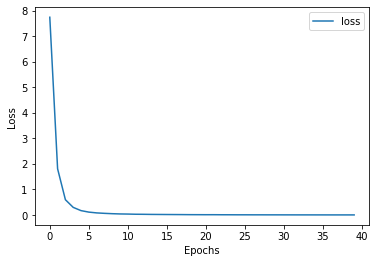

In [18]:
# Loss x Epoch
for label in ["loss"]:
    plt.plot(hist.history[label], label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

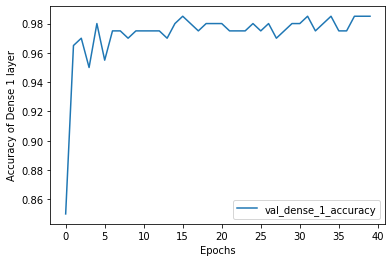

In [19]:
# 1st Dense Layer Accuracy x Epoch
for label in ["val_dense_1_accuracy"]:
    plt.plot(hist.history[label],label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

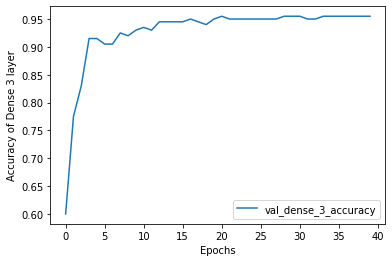

In [20]:
# 3rd Dense Layer Accuracy x Epoch
for label in ["val_dense_3_accuracy"]:
    plt.plot(hist.history[label],label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 3 layer")
plt.show()

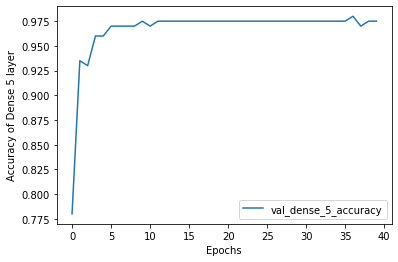

In [21]:
# 5th Dense Layer Accuracy x Epoch
for label in ["val_dense_5_accuracy"]:
    plt.plot(hist.history[label],label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 5 layer")
plt.show()

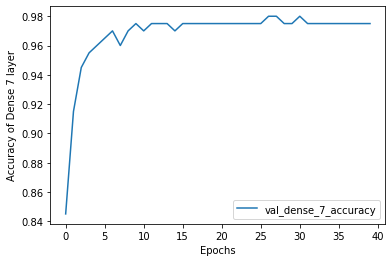

In [22]:
# 7th Dense Layer Accuracy x Epoch
for label in ["val_dense_7_accuracy"]:
    plt.plot(hist.history[label],label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 7 layer")
plt.show()

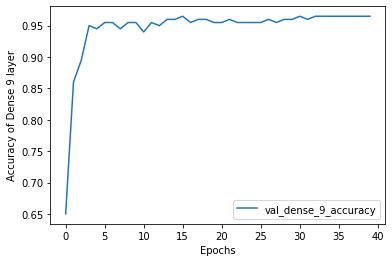

In [23]:
# 9th Dense Layer Accuracy x Epoch
for label in ["val_dense_9_accuracy"]:
    plt.plot(hist.history[label], label = label)
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 9 layer")
plt.show()

### Test

In [24]:
# Prediction function for captchas
def predict(filepath):
    
    # Applying greyscale
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    # Image Scale
    if img is not None:
        img = img / 255.0
        
    else:
        print("Not detected");

    # np.newaxis = 1    
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    # Reshape
    result = np.reshape(res, (5, 10))
    k_ind = []
    probs = []
    
    for i in result:
        # Index
        k_ind.append(np.argmax(i))

    capt = ''
    
    for k in k_ind:
        # Character for index
        capt += character[k]
        
    return capt 

In [25]:
# Test images
test_set = os.listdir("real_captchas/test")
test_set

['00335.jpeg',
 '00526.jpeg',
 '01316.jpeg',
 '01462.jpeg',
 '01586.jpeg',
 '03627.jpeg',
 '03696.jpeg',
 '04421.jpeg',
 '04877.jpeg',
 '05012.jpeg',
 '05272.jpeg',
 '06567.jpeg',
 '06794.jpeg',
 '06838.jpeg',
 '07005.jpeg',
 '07212.jpeg',
 '07447.jpeg',
 '07458.jpeg',
 '07562.jpeg',
 '08101.jpeg',
 '08302.jpeg',
 '09304.jpeg',
 '09623.jpeg',
 '10035.jpeg',
 '10769.jpeg',
 '10789.jpeg',
 '10958.jpeg',
 '11131.jpeg',
 '11199.jpeg',
 '29573.jpeg',
 '29823.jpeg',
 '30157.jpeg',
 '30203.jpeg',
 '30373.jpeg',
 '31472.jpeg',
 '31715.jpeg',
 '33641.jpeg',
 '33748.jpeg',
 '33977.jpeg',
 '34525.jpeg',
 '34761.jpeg',
 '35622.jpeg',
 '35683.jpeg',
 '36778.jpeg',
 '36998.jpeg',
 '37728.jpeg',
 '38469.jpeg',
 '39623.jpeg',
 '40058.jpeg',
 '40297.jpeg',
 '40872.jpeg',
 '42893.jpeg',
 '43309.jpeg',
 '43786.jpeg',
 '44156.jpeg',
 '44312.jpeg',
 '44598.jpeg',
 '44791.jpeg',
 '44875.jpeg',
 '45103.jpeg',
 '48189.jpeg',
 '48687.jpeg',
 '50052.jpeg',
 '50685.jpeg',
 '50719.jpeg',
 '50744.jpeg',
 '50890.jp

In [26]:
# Real values
y_test = []
for i in range(len(test_set)):
    y_test.append(test_set[i][:-5])
y_test

['00335',
 '00526',
 '01316',
 '01462',
 '01586',
 '03627',
 '03696',
 '04421',
 '04877',
 '05012',
 '05272',
 '06567',
 '06794',
 '06838',
 '07005',
 '07212',
 '07447',
 '07458',
 '07562',
 '08101',
 '08302',
 '09304',
 '09623',
 '10035',
 '10769',
 '10789',
 '10958',
 '11131',
 '11199',
 '29573',
 '29823',
 '30157',
 '30203',
 '30373',
 '31472',
 '31715',
 '33641',
 '33748',
 '33977',
 '34525',
 '34761',
 '35622',
 '35683',
 '36778',
 '36998',
 '37728',
 '38469',
 '39623',
 '40058',
 '40297',
 '40872',
 '42893',
 '43309',
 '43786',
 '44156',
 '44312',
 '44598',
 '44791',
 '44875',
 '45103',
 '48189',
 '48687',
 '50052',
 '50685',
 '50719',
 '50744',
 '50890',
 '52061',
 '52146',
 '52204',
 '54031',
 '54997',
 '55082',
 '55282',
 '55425',
 '55538',
 '55610',
 '55623',
 '55943',
 '56450',
 '56766',
 '57518',
 '68777',
 '69923',
 '70060',
 '70067',
 '70455',
 '71048',
 '71550',
 '71591',
 '71781',
 '72034',
 '72878',
 '72973',
 '73169',
 '73272',
 '73603',
 '75162',
 '75359',
 '76305',


In [27]:
# Model Predictions
y_pred = []
for i in range(len(test_set)):
    pred = predict('real_captcha/test/{}'.format(test_set[i]))
    y_pred.append(pred)
y_pred

['00335',
 '00526',
 '01316',
 '01462',
 '01586',
 '03627',
 '03696',
 '04421',
 '04877',
 '05012',
 '05272',
 '06567',
 '06794',
 '06838',
 '07005',
 '07212',
 '07447',
 '07458',
 '07562',
 '08101',
 '08302',
 '09304',
 '09623',
 '10035',
 '10769',
 '10789',
 '10958',
 '11131',
 '11699',
 '29572',
 '29823',
 '30157',
 '30203',
 '30373',
 '31472',
 '31715',
 '33641',
 '33748',
 '33977',
 '34525',
 '34761',
 '35522',
 '35583',
 '36778',
 '36998',
 '37728',
 '38469',
 '39623',
 '40068',
 '40297',
 '40872',
 '42893',
 '43309',
 '43786',
 '44156',
 '44312',
 '44598',
 '44791',
 '44675',
 '45103',
 '48189',
 '48687',
 '50052',
 '50685',
 '60719',
 '50744',
 '50890',
 '52061',
 '52146',
 '52204',
 '54031',
 '54997',
 '55082',
 '55282',
 '55125',
 '55538',
 '65610',
 '55623',
 '55943',
 '56450',
 '56766',
 '57518',
 '68777',
 '69923',
 '70000',
 '70067',
 '70455',
 '71048',
 '71551',
 '71391',
 '71781',
 '72034',
 '72878',
 '72973',
 '73169',
 '73272',
 '75603',
 '75162',
 '75331',
 '76305',


In [28]:
# Results
results = []
for i in range(len(test_set)):
    if y_pred[i] == y_test[i]:
        results.append(1)
    else:
        results.append(0)
res = collections.Counter(results)
print(res)

Counter({1: 173, 0: 27})


### Predictions

#### Synthetic Captcha

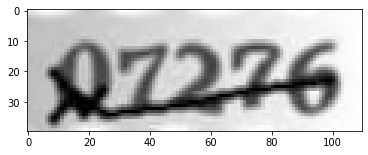

In [29]:
# Synthetic Image to test
img = cv2.imread('single_tests/test39.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [30]:
# Prediction
print("Predicted Captcha =", predict('single_tests/test39.jpeg'))

Predicted Captcha = 27978


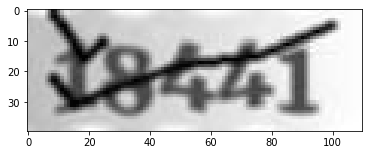

In [31]:
# Second synthetic image to test
img = cv2.imread('single_tests/test40.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [32]:
# Prediction for secound image
print("Predicted Captcha =", predict('single_tests/test40.jpeg'))

Predicted Captcha = 41571


#### Real Captcha

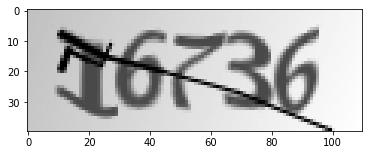

In [33]:
# Real image to test
img = cv2.imread('single_tests/test37.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [34]:
# Prediction for real image
print("Predicted Captcha =", predict('single_tests/test37.jpeg'))

Predicted Captcha = 16736


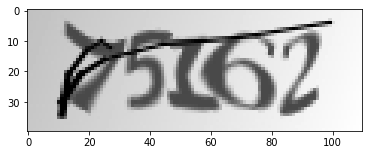

In [35]:
# Secound image to test
img = cv2.imread('single_tests/test38.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [36]:
# Prediction for secound image
print("Predicted Captcha =", predict('single_tests/test38.jpeg'))

Predicted Captcha = 75162


### Exporting Model

In [37]:
model.save('model/v1.1')

INFO:tensorflow:Assets written to: model/v7.0/assets
